<a href="https://colab.research.google.com/github/kcat28/CCDATS1L_EXERCISES_COM221ML/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [2]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [3]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [16]:
df_exam_scores.groupby('Method')['StudentID'].count()

,StudentID
Method,
A,17
B,17
C,16


Compute the mean and standard deviation of exam scores for each group.

In [19]:
# put your answer here
df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])

,mean,std
Method,,
A,78.588235,2.575336
B,86.294118,2.365500
C,71.937500,1.768945


Use a plot to show the exam scores by teaching method.

<Axes: title={'center': 'Score'}, xlabel='Method'>

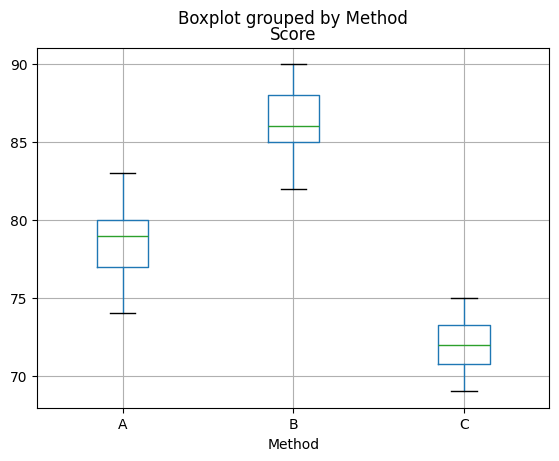

In [20]:
# put your answer here
df_exam_scores.boxplot(column='Score', by='Method')

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [26]:
# put your answer here
Scores_A = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
Scores_B = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
Scores_C = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

f_stats, p_val = stats.f_oneway(Scores_A, Scores_B, Scores_C)

print(f"F-statistic: {f_stats:}")
print(f"p-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean exam scores among students taught using three different teaching methods.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean exam scores among students taught using three different teaching methods.")

F-statistic: 165.17845596593054
p-value: 5.5032645988699085e-22
Reject the null hypothesis. There is a significant difference in mean exam scores among students taught using three different teaching methods.


Interpret the results. What does it say about the relationship between teaching method and exam scores?

### Interpretation of ANOVA Results

Since the p-value (`5.5032645988699085e-22`) is much less than the significance level (α = 0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in mean exam scores among students taught using the three different teaching methods. In simpler terms, the teaching method does have an effect on students' exam scores.

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [29]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [46]:
# put your answer here
print(f"{df_littering_data['Gender'].value_counts()} \n")
print(df_littering_data['Litter'].value_counts())

Gender
Male      20
Female    20
Name: count, dtype: int64 

Litter
No     22
Yes    18
Name: count, dtype: int64


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [49]:
# put your answer here
contingency_table = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'])
display(contingency_table)

Litter,No,Yes
Gender,,
Female,14,6
Male,8,12


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

In [51]:
# Hypotheses
# H₀: Gender and littering behavior are independent (no association).
# H₁: Gender and littering behavior are associated (not independent).

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [56]:
# put your answer here
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"p-value: {p:.2e}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis. Gender and littering behavior are associated.")
else:
    print("Fail to reject the null hypothesis. Gender and littering behavior are independent.")

Chi-squared statistic: 2.53
p-value: 1.12e-01
Degrees of freedom: 1
Fail to reject the null hypothesis. Gender and littering behavior are independent.


Interpret your results. Is there evidence that gender and littering behavior are associated?

### Interpretation of Chi - squared Statistics

Since the p-value (`1.12e-01`) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis. This indicates that there is no statistically significant relationship between genders and littering behavior.